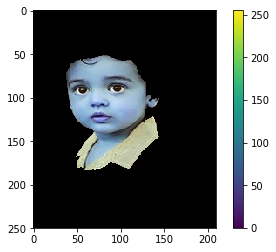

True

In [184]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('Input Images/kid2.jpg')
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
res = cv.resize(img,(210,250), interpolation = cv.INTER_CUBIC)
mask = np.zeros(res.shape[:2],np.uint8)
#rect = (35,20,160,180)
rect = (30,1,170,185)

#circ = (100,110,80)
cv.grabCut(res,mask,rect,bgdModel,fgdModel,20,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
res = res*mask2[:,:,np.newaxis]
cv.imwrite('cropped.png',res)
plt.imshow(res),plt.colorbar(),plt.show()

file_name = "cropped.png"
src = cv.imread(file_name, 1)
tmp = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
_,alpha = cv.threshold(tmp,0,255,cv.THRESH_BINARY)
b, g, r = cv.split(src)
rgba = [b,g,r, alpha]
dst = cv.merge(rgba,4)
cv.imwrite("test.png", dst)



In [185]:
# import the necessary packages
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import os
from matplotlib import pyplot as plt

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# load image
img = cv2.imread('test.png')
h, w, ch = img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# add an alpha channel to image
b,g,r = cv2.split(img);
a = np.ones((h,w,1), np.uint8) * 255
img = cv2.merge((b, g, r, a))
# detect face
rects = detector(gray,1)
roi = rects[0] # region of interest
shape = predictor(gray, roi)
shape = face_utils.shape_to_np(shape)
# extract jawline
jawline = shape[3:14]
top = min(jawline[:,1])
bottom = max(jawline[:,1])
# extend contour for masking
jawline = np.append(jawline, [ w-1, jawline[-1][1] ]).reshape(-1, 2)
jawline = np.append(jawline, [ w-1, h-1 ]).reshape(-1, 2)
jawline = np.append(jawline, [ 0, h-1 ]).reshape(-1, 2)
jawline = np.append(jawline, [ 0, jawline[0][1] ]).reshape(-1, 2)
contours = [ jawline ]
# generate mask
mask = np.ones((h,w,1), np.uint8) * 255 # times 255 to make mask 'showable'
cv2.drawContours(mask, contours, -1, 0, -1) # remove below jawline
# apply to image
result = cv2.bitwise_and(img, img, mask = mask)
#result = cv2.add(img,img, mask = mask)

#result = result[top:bottom, roi.left():roi.left()+roi.width()] # crop ROI
cv2.imwrite('result.png', result); 
cv2.imwrite('mask.png', mask); 

#plt.imshow(result)


In [187]:
import cv2
file_name = "result.png"
src = cv2.imread(file_name, 1)
tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
b, g, r = cv2.split(src)
rgba = [b,g,r, alpha]
dst = cv2.merge(rgba,4)
cv2.imwrite("kid2*.png", dst)

True